In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np # linear algebra
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
glob_coun = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
glob_coun.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [3]:
glob_coun.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


As the describe showed, 'Average Temperature' column is missing some data. While it is possible to fill in the missing ones, it is improbable. The data is too large for it, and if I just selected a constant data, it would make no sense. For example, if I set the temperature to 17 as the mean data, it will look funny during January, or February. 

So for this project, I will focus into into 1 categorizes:
    1. The average temperature per year per country


# Average Temperature per Year

In [4]:
glob_coun.dt = pd.to_datetime(glob_coun.dt).dt.strftime('%d/%m/%Y')
glob_coun['dt']=glob_coun['dt'].apply(lambda x:x[6:])
glob_coun=glob_coun.groupby(['dt', 'Country'])['AverageTemperature'].mean().reset_index()
glob_coun.head()

,dt,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


In [5]:
len(glob_coun.groupby('Country').count())

243

As we can see here, there is 235 countries. We should all know that countries like France, Denmark, and UK belong to Europe, so no need to clarify on that. 

In [6]:
glob_coun = glob_coun[~glob_coun['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

glob_coun = glob_coun.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

glob_coun.head()

,dt,Country,AverageTemperature
0,1743,Albania,8.620
1,1743,Andorra,7.556
2,1743,Austria,2.482
3,1743,Belarus,0.767
4,1743,Belgium,7.106


I will try to make a world map, so we can see the temperature from each country. I will compare between 1900 and 2013. Why 1900? Because it was after the Industrial Revolution preiod. One of the most polluted period in human history. I want to see if those pollutions had any impact on the earth

In [7]:
countries2013 = np.unique(glob_coun.Country[glob_coun['dt']== '2013'])
countries1920 = np.unique(glob_coun.Country[glob_coun['dt']== '1920'])

### 1900

In [9]:
data = [ dict(
        type = 'choropleth',
        locations = countries1920,
        z = glob_coun.AverageTemperature[glob_coun['dt']== '1920'],
        locationmode = 'country names',
        text = countries1920,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average<br>Temperature,<br>°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in 1920',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'white',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

### 2013

In [10]:
data = [ dict(
        type = 'choropleth',
        locations = countries2013,
        z = glob_coun.AverageTemperature[glob_coun['dt']== '2013'],
        locationmode = 'country names',
        text = countries2013,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '', 
            title = '# Average<br>Temperature,<br>°C')
            )
       ]

layout = dict(
    title = 'Average land temperature in 2013',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'white',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

Based on the globes' color, it is a bit difficult to see any drastical change happens in more than 100 years. However, if look closely at big countries such as USA, Russia, China, Germany, etc., it is noticeable that the temperature has been increased by 2-3 degree in the course of 100 years. 

In [12]:
temperature_1920, countries_1920 = (list(x) for x in zip(*sorted(zip(glob_coun.AverageTemperature[glob_coun['dt']== '1920'], countries1920), 
                                                             reverse = True)))
temperature_2013, countries_2013 = (list(x) for x in zip(*sorted(zip(glob_coun.AverageTemperature[glob_coun['dt']== '2013'], countries2013), 
                                                             reverse = True)))

 (-20, 32),

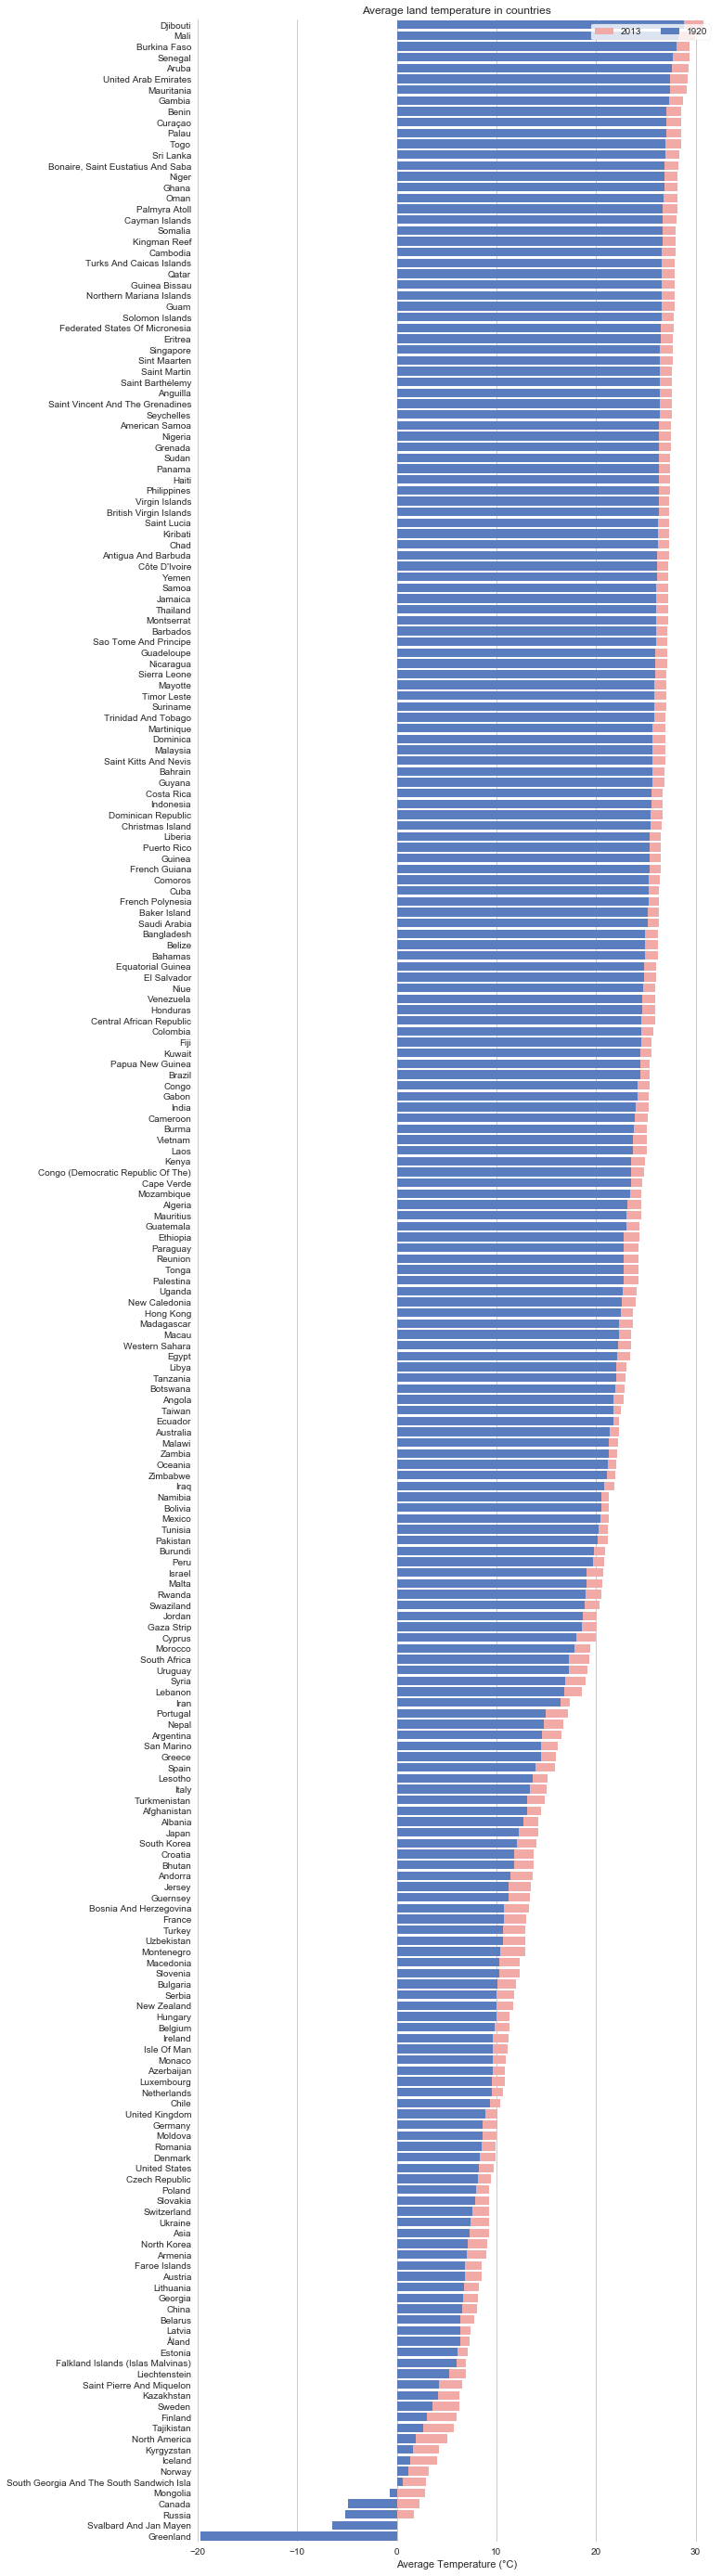

In [36]:
sns.set(style="whitegrid", font_scale=1)

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 50))


#2013
sns.set_color_codes("pastel")
sns.barplot(x=temperature_2013, y=countries_2013,
            label="2013", color="r")
#1920
sns.set_color_codes("muted")
sns.barplot(x=temperature_1920, y=countries_1920,
            label="1920", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(xlim=(-20, 32), ylabel="",
       xlabel="Average Temperature (°C)",
       title='Average land temperature in countries')
sns.despine(left=True, bottom=True)

Here you can see how temperature has changed since 1920 to 2013. The temperature has been increased by at least 3 degree Cesius everywhere. Canada and Russia actually showed some worrisom data when they were both negative degrees in 1920, but then were positive in 2013. Those mean that the coldest places were affected the most, which could be a dangerous sign as glacier will melt when temperature above 0 degree Celsius. This will lead to enormous glacier melting rate if the temperature keeps climbing.